# From Linear Transformations to Matrices: A Visual Guide

This notebook translates the core ideas of linear algebra from handwritten notes into an interactive explanation. We'll explore how concepts like **Linear Combinations** and **Linear Transformations** lead us directly to the idea of a **Matrix**.

We'll use `NumPy` for our calculations and `Matplotlib` to visualize these ideas.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# A helper function to set up our plots
def setup_plot():
    plt.figure(figsize=(6, 6))
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.axvline(x=0, color='k', linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")

## 1. Linear Combinations & Span

At the heart of linear algebra is the idea of a **linear combination**. This is just a fancy term for scaling vectors and adding them together.

> Any time that we scale 2 vectors and add them like this, it's called a **linear combination** of those 2 vectors.

Let's say we have two basis vectors, $\hat{i}$ and $\hat{j}$:
$$ \hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad \hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} $$

Any other vector, like $\vec{v} = \begin{bmatrix} 2 \\ 3 \end{bmatrix}$, can be described as a linear combination of $\hat{i}$ and $\hat{j}$:

$$ \vec{v} = 2\hat{i} + 3\hat{j} = 2\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 3\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 2 \\ 3 \end{bmatrix} $$

The **span** of $\hat{i}$ and $\hat{j}$ is the set of all possible vectors you can reach by taking all their possible linear combinations. For $\hat{i}$ and $\hat{j}$, their span is the entire 2D plane.

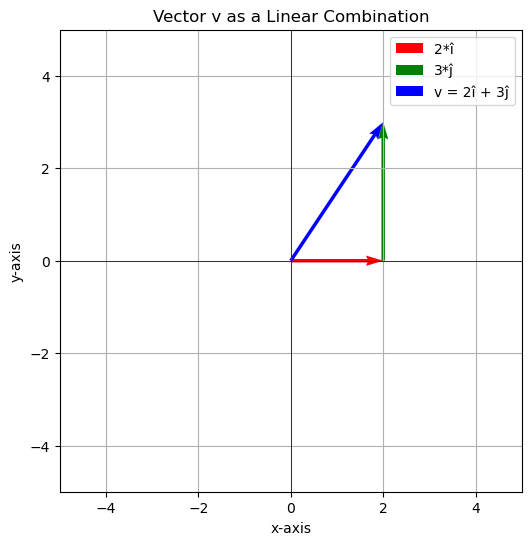

In [21]:
# Define our basis vectors
i_hat = np.array([1, 0])
j_hat = np.array([0, 1])

# Define a vector v as a linear combination of i_hat and j_hat
a = 2
b = 3
v = a * i_hat + b * j_hat

# ---- Visualization ----
setup_plot()
plt.title("Vector v as a Linear Combination")

# Plot the scaled basis vectors and the final vector v
# Origin point for all vectors
origin = [0], [0]

# Scaled i_hat (a*i_hat)
plt.quiver(*origin, a * i_hat[0], a * i_hat[1], scale=1, scale_units='xy', angles='xy', color='r', label=f'{a}*î')

# Scaled j_hat (b*j_hat), starting from the end of a*i_hat
plt.quiver(a * i_hat[0], a * i_hat[1], b * j_hat[0], b * j_hat[1], scale=1, scale_units='xy', angles='xy', color='g', label=f'{b}*ĵ')

# Resulting vector v
plt.quiver(*origin, v[0], v[1], scale=1, scale_units='xy', angles='xy', color='b', label='v = 2î + 3ĵ')

plt.legend()
plt.show()

## 2. Linear Transformations

A **transformation** is essentially a function that takes an input vector and gives an output vector. The word "transformation" is used to suggest movement—we can imagine the input vector moving to the position of the output vector.

A transformation is **linear** if it follows two main rules:
1.  **All lines must remain parallel lines** (they can't get curved).
2.  **The origin must remain fixed** in space.

A consequence of this is that grid lines remain **parallel and evenly spaced**.

### The Key Idea: Track the Basis Vectors

Here's the most important insight: to describe a linear transformation, we only need to know where the basis vectors ($\hat{i}$ and $\hat{j}$) land. Everything else will follow from that.

Let's say we have a vector $\vec{v} = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$, which is just $-1\hat{i} + 2\hat{j}$.

If a linear transformation $T$ moves $\hat{i}$ to a new position $T(\hat{i})$ and $\hat{j}$ to $T(\hat{j})$, then our vector $\vec{v}$ will move to:

$$ T(\vec{v}) = -1 \cdot T(\hat{i}) + 2 \cdot T(\hat{j}) $$

The output vector is just the *same linear combination* of the *new, transformed basis vectors*.

Let's imagine a transformation where:
- $\hat{i}$ lands at $\begin{bmatrix} 2 \\ 3 \end{bmatrix}$ 
- $\hat{j}$ lands at $\begin{bmatrix} 5 \\ 2 \end{bmatrix}$ 

Where does our vector $\vec{v} = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$ land?

$$ T(\vec{v}) = -1 \begin{bmatrix} 2 \\ 3 \end{bmatrix} + 2 \begin{bmatrix} 5 \\ 2 \end{bmatrix} = \begin{bmatrix} -2 \\ -3 \end{bmatrix} + \begin{bmatrix} 10 \\ 4 \end{bmatrix} = \begin{bmatrix} 8 \\ 1 \end{bmatrix} $$

## 3. The Matrix: Packaging the Transformation

> A **Matrix** is just a way to describe and package the information needed to describe a linear transformation.

This is where the matrix comes in. A 2x2 matrix is simply a container that holds the coordinates of our transformed basis vectors.

- The **1st column** of the matrix is where the 1st basis vector ($\hat{i}$) lands.
- The **2nd column** of the matrix is where the 2nd basis vector ($\hat{j}$) lands.

So for our transformation above, the matrix $M$ is:

$$ M = \begin{bmatrix} 2 & 5 \\ 3 & 2 \end{bmatrix} $$

Where the first column $\begin{bmatrix} 2 \\ 3 \end{bmatrix}$ is $T(\hat{i})$ and the second column $\begin{bmatrix} 5 \\ 2 \end{bmatrix}$ is $T(\hat{j})$.


### Matrix-Vector Multiplication

Now, the action of applying the transformation to a vector $\vec{v} = \begin{bmatrix} x \\ y \end{bmatrix}$ is called **matrix-vector multiplication**.

$$ \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = x \begin{bmatrix} a \\ c \end{bmatrix} + y \begin{bmatrix} b \\ d \end{bmatrix} = \begin{bmatrix} ax + by \\ cx + dy \end{bmatrix} $$

Notice that this is *exactly the same* as taking a linear combination of the columns of the matrix (the transformed basis vectors), weighted by the components of the input vector!

Let's use Python to verify our earlier example: transforming $\vec{v} = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$ with matrix $M = \begin{bmatrix} 2 & 5 \\ 3 & 2 \end{bmatrix}$.

In [22]:
# The transformation matrix
# Column 1 is T(i_hat), Column 2 is T(j_hat)
M = np.array([
    [2, 5],
    [3, 2]
])

# The input vector
v = np.array([-1, 2])

# Apply the transformation using matrix multiplication
# The '@' symbol is NumPy's operator for matrix multiplication
transformed_v = M @ v

print(f"Original vector v:\n{v}\n")
print(f"Transformation matrix M:\n{M}\n")
print(f"Transformed vector T(v):\n{transformed_v}")

Original vector v:
[-1  2]

Transformation matrix M:
[[2 5]
 [3 2]]

Transformed vector T(v):
[8 1]


The result $\begin{bmatrix} 8 \\ 1 \end{bmatrix}$ matches our manual calculation. This confirms that matrix multiplication is the computational rule for applying the linear transformation described by the matrix.

### Visualizing the Full Transformation

Let's see what this transformation does to the entire grid. We'll plot the original basis vectors and our vector `v`, and then see where they land after the transformation defined by matrix `M`.

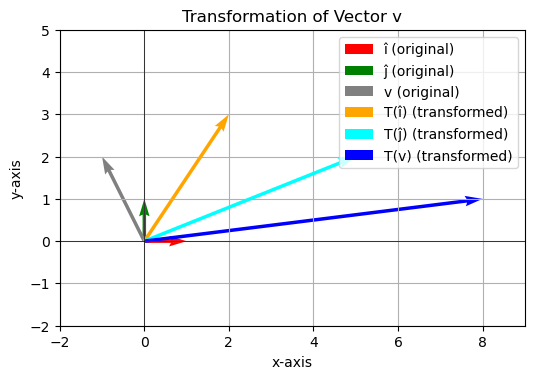

In [ ]:

# A helper function to set up our plots
def setup_plot():
    plt.figure(figsize=(6, 6))
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.axvline(x=0, color='k', linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")

# Origin point for all vectors
origin = [0], [0]

# The transformation matrix 
# Column 1 is where i_hat lands, Column 2 is where j_hat lands
M = np.array([
    [2, 5],
    [3, 2]
])

# The input vector 
v = np.array([-1, 2])

# Apply the transformation using matrix multiplication
# The '@' symbol is NumPy's operator for matrix multiplication
transformed_v = M @ v

# Get the transformed basis vectors from the columns of M
T_i_hat = M[:, 0]
T_j_hat = M[:, 1]

# ---- Visualization ----
setup_plot()
plt.title("Transformation of Vector v")

# Define the origin point
origin = [0], [0]

# Plot original vector and basis vectors
plt.quiver(*origin, i_hat[0], i_hat[1], scale=1, scale_units='xy', angles='xy', color='r', label='î (original)')
plt.quiver(*origin, j_hat[0], j_hat[1], scale=1, scale_units='xy', angles='xy', color='g', label='ĵ (original)')
plt.quiver(*origin, v[0], v[1], scale=1, scale_units='xy', angles='xy', color='gray', label='v (original)')

# Plot transformed vector and basis vectors using DIFFERENT COLORS
plt.quiver(*origin, T_i_hat[0], T_i_hat[1], scale=1, scale_units='xy', angles='xy', color='orange', label='T(î) (transformed)')
plt.quiver(*origin, T_j_hat[0], T_j_hat[1], scale=1, scale_units='xy', angles='xy', color='cyan', label='T(ĵ) (transformed)')
plt.quiver(*origin, transformed_v[0], transformed_v[1], scale=1, scale_units='xy', angles='xy', color='b', label='T(v) (transformed)')

plt.xlim(-2, 9)
plt.ylim(-2, 5)
plt.legend()
plt.show()